In [1]:
from google.colab import files
uploaded = files.upload()   # Upload your CSV file (student_feedback.csv)



Saving student_feedback.csv to student_feedback.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud


In [3]:
df = pd.read_csv("student_feedback.csv")   # replace with your filename
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-null   int64
 9

In [4]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


In [5]:
df = df.drop(columns=["Student ID"], errors="ignore")
df = df.dropna()


In [6]:
print(df.describe())


       Well versed with the subject  \
count                   1001.000000   
mean                       7.497502   
std                        1.692998   
min                        5.000000   
25%                        6.000000   
50%                        8.000000   
75%                        9.000000   
max                       10.000000   

       Explains concepts in an understandable way  Use of presentations  \
count                                 1001.000000           1001.000000   
mean                                     6.081918              5.942058   
std                                      2.597168              1.415853   
min                                      2.000000              4.000000   
25%                                      4.000000              5.000000   
50%                                      6.000000              6.000000   
75%                                      8.000000              7.000000   
max                                     10.00000

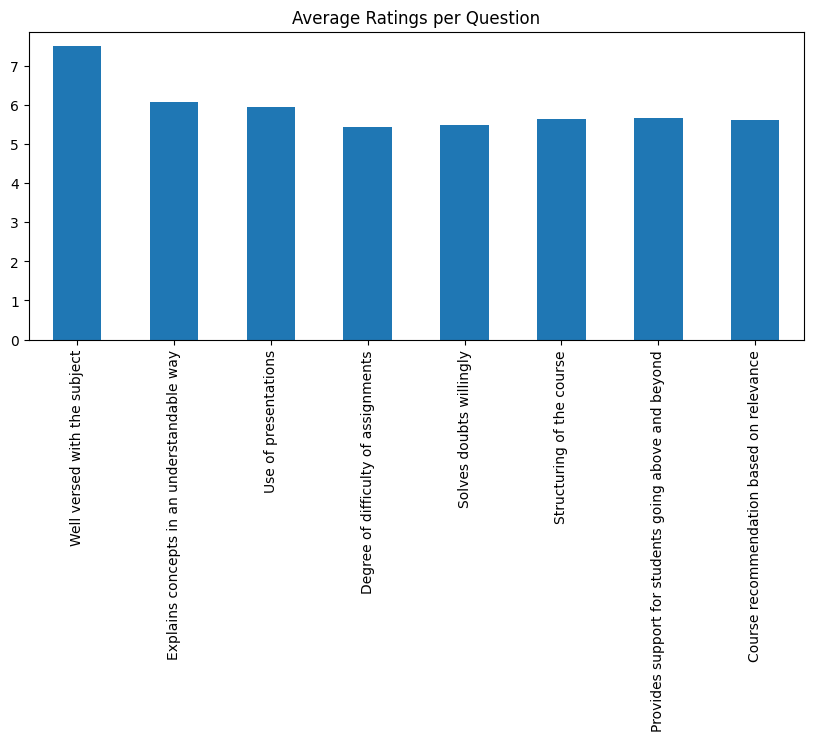

In [7]:
question_cols = df.select_dtypes(include=[np.number]).columns
df[question_cols].mean().plot(kind="bar", figsize=(10,4), title="Average Ratings per Question")
plt.show()


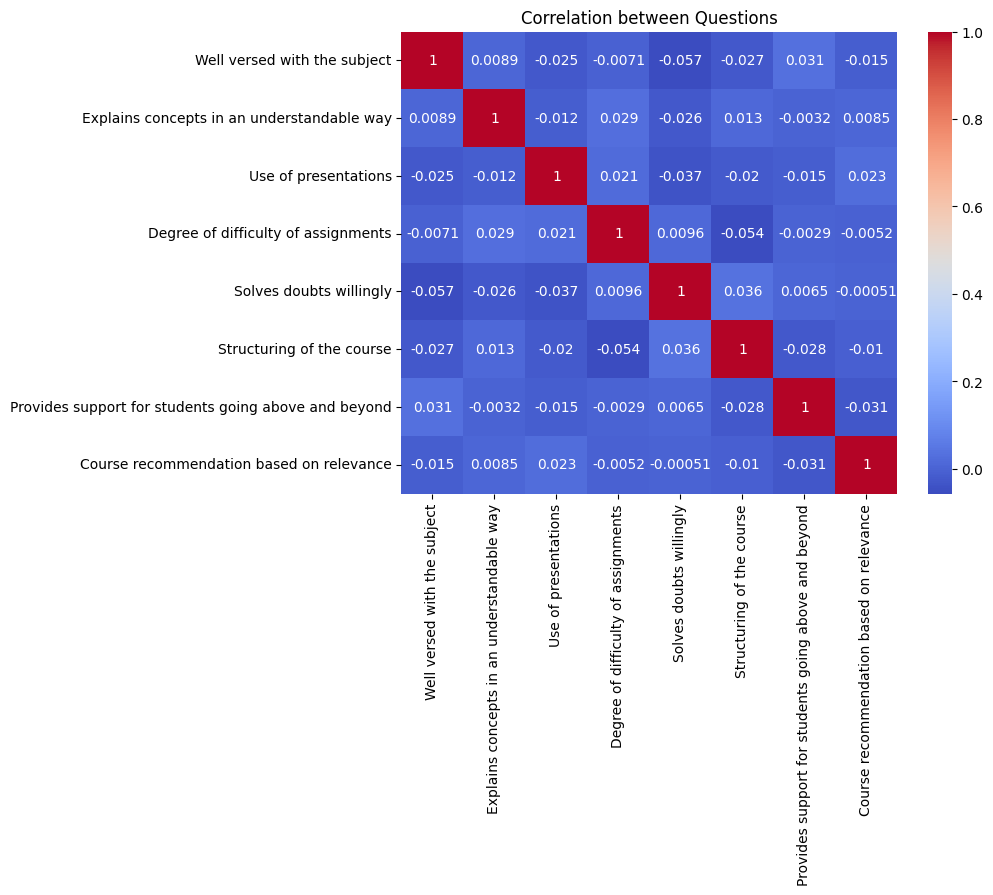

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df[question_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Questions")
plt.show()


In [14]:
print(df.columns.tolist())


['Well versed with the subject', 'Explains concepts in an understandable way', 'Use of presentations', 'Degree of difficulty of assignments', 'Solves doubts willingly', 'Structuring of the course', 'Provides support for students going above and beyond', 'Course recommendation based on relevance']


Average rating per question:
Well versed with the subject                            7.497502
Explains concepts in an understandable way              6.081918
Use of presentations                                    5.942058
Provides support for students going above and beyond    5.662338
Structuring of the course                               5.636364
Course recommendation based on relevance                5.598402
Solves doubts willingly                                 5.474525
Degree of difficulty of assignments                     5.430569
dtype: float64


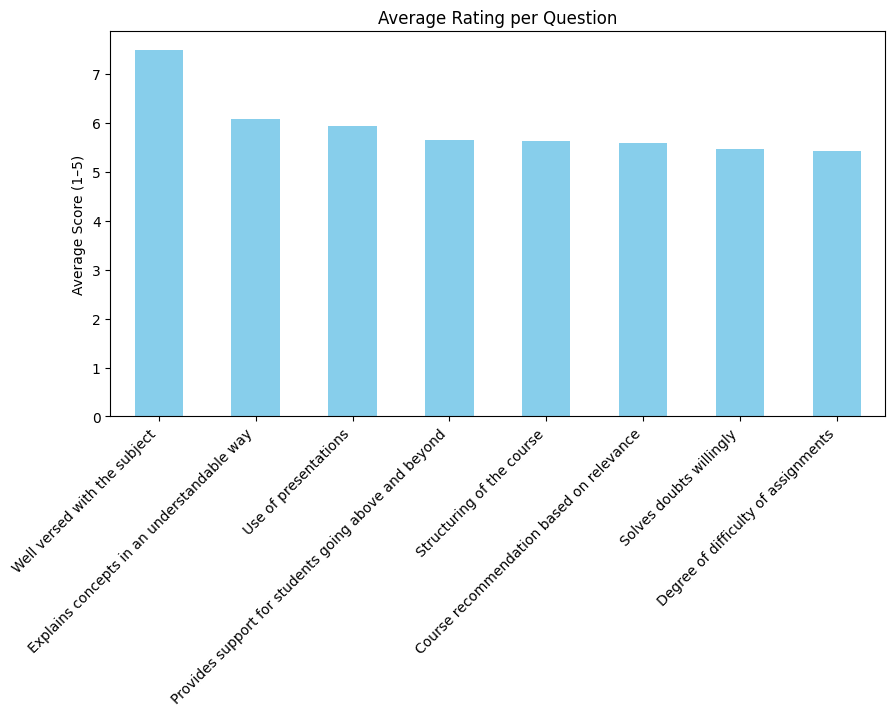

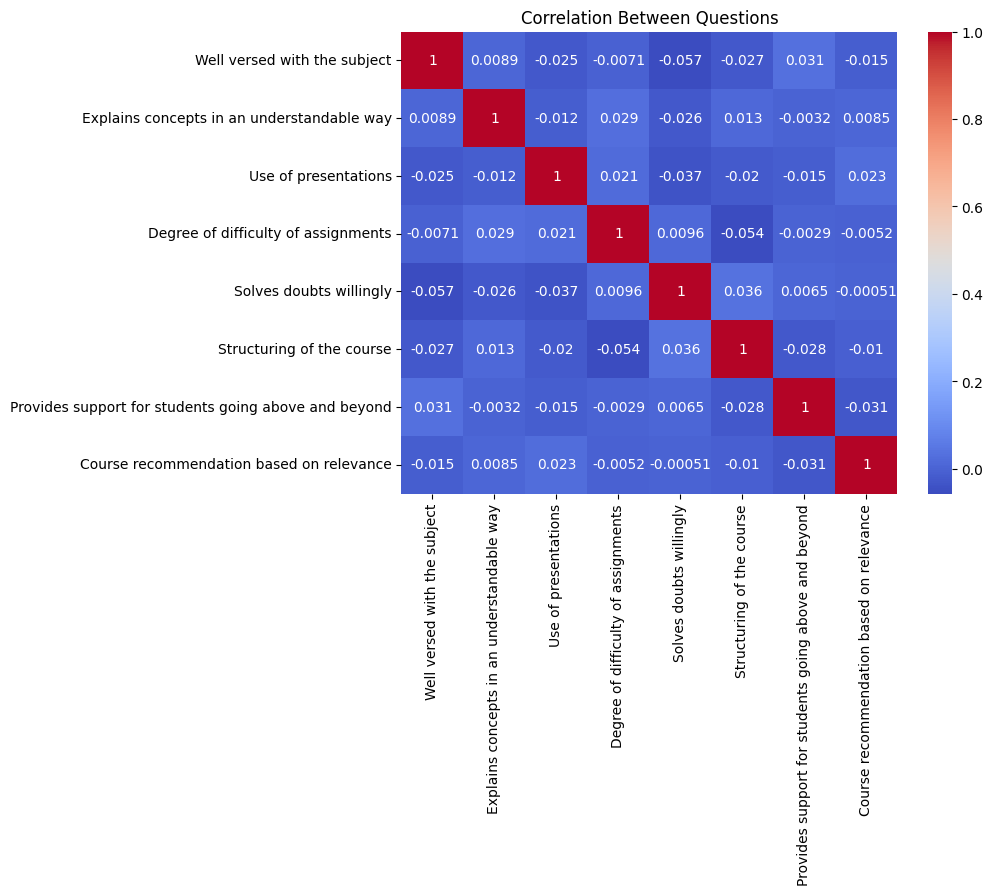

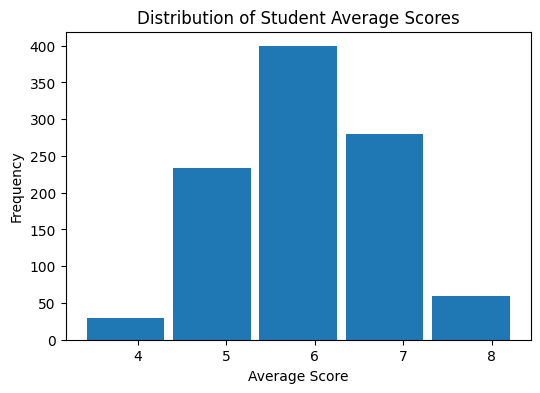

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data (already done in your case)
# df = pd.read_csv("student_feedback.csv")

# Your rating questions (all numeric)
question_cols = [
    'Well versed with the subject',
    'Explains concepts in an understandable way',
    'Use of presentations',
    'Degree of difficulty of assignments',
    'Solves doubts willingly',
    'Structuring of the course',
    'Provides support for students going above and beyond',
    'Course recommendation based on relevance'
]

# Average score per question
mean_scores = df[question_cols].mean().sort_values(ascending=False)
print("Average rating per question:")
print(mean_scores)

# Bar chart
plt.figure(figsize=(10,5))
mean_scores.plot(kind='bar', color='skyblue')
plt.title("Average Rating per Question")
plt.ylabel("Average Score (1–5)")
plt.xticks(rotation=45, ha="right")
plt.show()

# Heatmap for correlations
plt.figure(figsize=(8,6))
sns.heatmap(df[question_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Questions")
plt.show()

# Per-student average
df["average_score"] = df[question_cols].mean(axis=1)

plt.figure(figsize=(6,4))
df["average_score"].plot(kind="hist", bins=5, rwidth=0.9)
plt.title("Distribution of Student Average Scores")
plt.xlabel("Average Score")
plt.show()
